In [1]:
# Project demonstrates early stopping technique which is used to stop the training based on the loss function
# on the model.fit() call


#drop out layers are the layers which are used to turn off neurons during training to prevent overfitting
# Eaach drop out layer will drop a user-defined percentage of neurons in the previous layer for every batch


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\KARAN S07\\Desktop\\Final Year\\Deep Learning\\TF-Course-Notebooks\\TF_Course_Notebooks\\DATA\\cancer_classification.csv")

In [4]:
# to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


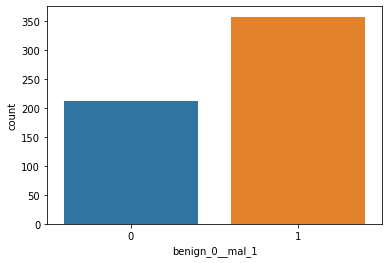

In [6]:
#for classification task it is essential to count the number of instances of each label
# it is clear from the plot that the malignant tumors are higher in the dataset compared to benign records.
sns.countplot(x="benign_0__mal_1",data=df)

In [7]:
# correlation of various features
df.corr()['benign_0__mal_1'][:-1].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

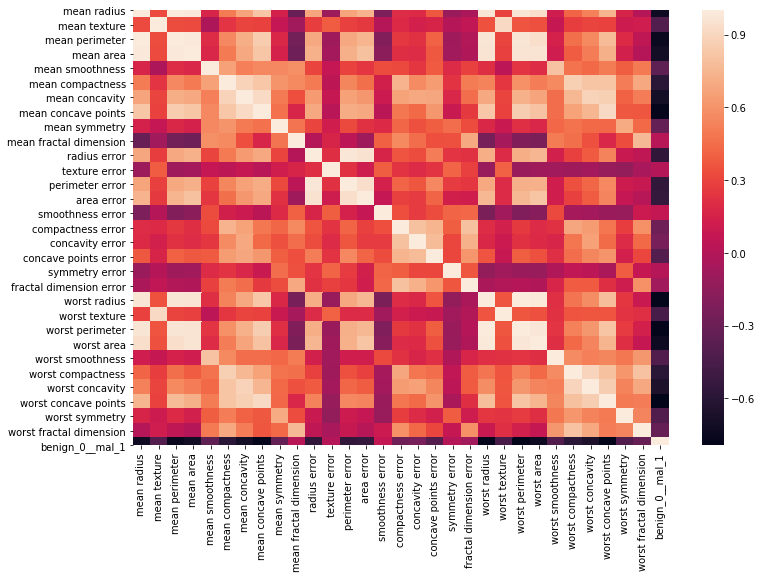

In [8]:
# heat-map can be used to visualize the correlation betwen various features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Training

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)

### Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Building the model


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
xtrain.shape

(426, 30)

In [15]:


model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# for binary classification the final layer should have the activation function as sigmoid since we need result 
# in the range of 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [16]:
model.fit(x=xtrain,y=ytrain,epochs=600,validation_data=(xtest,ytest))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 10ms/sample - loss: 0.6885 - val_loss: 0.6693
Epoch 2/600
426/426 [==============================] - 0s 425us/sample - loss: 0.6556 - val_loss: 0.6381
Epoch 3/600
426/426 [==============================] - 0s 336us/sample - loss: 0.6237 - val_loss: 0.6056
Epoch 4/600
426/426 [==============================] - 0s 338us/sample - loss: 0.5898 - val_loss: 0.5685
Epoch 5/600
426/426 [==============================] - 0s 345us/sample - loss: 0.5518 - val_loss: 0.5292
Epoch 6/600
426/426 [==============================] - 0s 317us/sample - loss: 0.5133 - val_loss: 0.4878
Epoch 7/600
426/426 [==============================] - 0s 322us/sample - loss: 0.4702 - val_loss: 0.4445
Epoch 8/600
426/426 [==============================] - 0s 308us/sample - loss: 0.4213 - val_loss: 0.4047
Epoch 9/600
426/426 [==============================] - 0s 336us/sample - loss: 0.3806 - val_loss: 0.3700
Epoch 10/6

Epoch 78/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0564 - val_loss: 0.0552
Epoch 79/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0583 - val_loss: 0.0558
Epoch 80/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0581 - val_loss: 0.0545
Epoch 81/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0581 - val_loss: 0.0556
Epoch 82/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0598 - val_loss: 0.0543
Epoch 83/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0558 - val_loss: 0.0554
Epoch 84/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0562 - val_loss: 0.0537
Epoch 85/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0558 - val_loss: 0.0545
Epoch 86/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0544 - val_loss: 0.0556
Epoch 87/600
426/426 [========================

426/426 [==============================] - 0s 291us/sample - loss: 0.0470 - val_loss: 0.0516
Epoch 155/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0489 - val_loss: 0.0490
Epoch 156/600
426/426 [==============================] - 0s 272us/sample - loss: 0.0483 - val_loss: 0.0519
Epoch 157/600
426/426 [==============================] - 0s 284us/sample - loss: 0.0473 - val_loss: 0.0522
Epoch 158/600
426/426 [==============================] - 0s 294us/sample - loss: 0.0469 - val_loss: 0.0488
Epoch 159/600
426/426 [==============================] - 0s 282us/sample - loss: 0.0483 - val_loss: 0.0519
Epoch 160/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0468 - val_loss: 0.0504
Epoch 161/600
426/426 [==============================] - 0s 270us/sample - loss: 0.0472 - val_loss: 0.0548
Epoch 162/600
426/426 [==============================] - 0s 312us/sample - loss: 0.0496 - val_loss: 0.0521
Epoch 163/600
426/426 [============================

426/426 [==============================] - 0s 218us/sample - loss: 0.0435 - val_loss: 0.0557
Epoch 231/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0430 - val_loss: 0.0578
Epoch 232/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0454 - val_loss: 0.0559
Epoch 233/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0452 - val_loss: 0.0558
Epoch 234/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0455 - val_loss: 0.0590
Epoch 235/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0537 - val_loss: 0.0528
Epoch 236/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0483 - val_loss: 0.0557
Epoch 237/600
426/426 [==============================] - 0s 240us/sample - loss: 0.0525 - val_loss: 0.0611
Epoch 238/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0489 - val_loss: 0.0551
Epoch 239/600
426/426 [============================

426/426 [==============================] - 0s 289us/sample - loss: 0.0446 - val_loss: 0.0607
Epoch 307/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0488 - val_loss: 0.0691
Epoch 308/600
426/426 [==============================] - 0s 272us/sample - loss: 0.0425 - val_loss: 0.0639
Epoch 309/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0386 - val_loss: 0.0651
Epoch 310/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0397 - val_loss: 0.0640
Epoch 311/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0395 - val_loss: 0.0673
Epoch 312/600
426/426 [==============================] - 0s 312us/sample - loss: 0.0431 - val_loss: 0.0621
Epoch 313/600
426/426 [==============================] - 0s 277us/sample - loss: 0.0413 - val_loss: 0.0683
Epoch 314/600
426/426 [==============================] - 0s 284us/sample - loss: 0.0513 - val_loss: 0.0622
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 188us/sample - loss: 0.0360 - val_loss: 0.0686
Epoch 383/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0391 - val_loss: 0.0698
Epoch 384/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0383 - val_loss: 0.0791
Epoch 385/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0369 - val_loss: 0.0697
Epoch 386/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0350 - val_loss: 0.0739
Epoch 387/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0358 - val_loss: 0.0785
Epoch 388/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0360 - val_loss: 0.0759
Epoch 389/600
426/426 [==============================] - 0s 287us/sample - loss: 0.0354 - val_loss: 0.0754
Epoch 390/600
426/426 [==============================] - 0s 294us/sample - loss: 0.0368 - val_loss: 0.0777
Epoch 391/600
426/426 [============================

426/426 [==============================] - 0s 324us/sample - loss: 0.0323 - val_loss: 0.0814
Epoch 459/600
426/426 [==============================] - 0s 282us/sample - loss: 0.0318 - val_loss: 0.0854
Epoch 460/600
426/426 [==============================] - 0s 301us/sample - loss: 0.0317 - val_loss: 0.0842
Epoch 461/600
426/426 [==============================] - 0s 341us/sample - loss: 0.0333 - val_loss: 0.0901
Epoch 462/600
426/426 [==============================] - 0s 308us/sample - loss: 0.0380 - val_loss: 0.0793
Epoch 463/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0361 - val_loss: 0.0872
Epoch 464/600
426/426 [==============================] - 0s 312us/sample - loss: 0.0327 - val_loss: 0.0874
Epoch 465/600
426/426 [==============================] - 0s 303us/sample - loss: 0.0315 - val_loss: 0.0873
Epoch 466/600
426/426 [==============================] - 0s 296us/sample - loss: 0.0329 - val_loss: 0.0850
Epoch 467/600
426/426 [============================

426/426 [==============================] - 0s 195us/sample - loss: 0.0299 - val_loss: 0.0836
Epoch 535/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0314 - val_loss: 0.0851
Epoch 536/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0331 - val_loss: 0.0885
Epoch 537/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0291 - val_loss: 0.0826
Epoch 538/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0296 - val_loss: 0.0889
Epoch 539/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0287 - val_loss: 0.0847
Epoch 540/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0332 - val_loss: 0.0923
Epoch 541/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0354 - val_loss: 0.0892
Epoch 542/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0289 - val_loss: 0.0907
Epoch 543/600
426/426 [============================

In [17]:
losses = pd.DataFrame(model.history.history)

In [18]:
losses.head()


,loss,val_loss
0,0.688499,0.669314
1,0.655601,0.638051
2,0.623727,0.605626
3,0.589840,0.568479
4,0.551840,0.529176


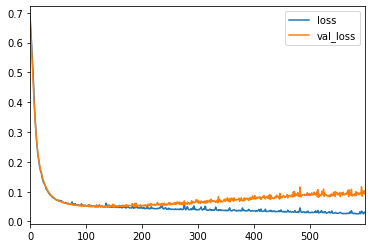

In [19]:
losses.plot()

In [20]:
# we can see from the plot that the model is overfitting after 200-230 epochs 
# as the training loss keeps on decreasing and validation loss starts increasing 
# this is a clear indication of overfitting



#### Demonstration of early stopping

In [21]:


model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# for binary classification the final layer should have the activation function as sigmoid since we need result 
# in the range of 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [23]:
from tensorflow.keras.callbacks import  EarlyStopping

In [25]:
#help(EarlyStoppingrlyStopping)

In [28]:
# syntax to use earlyStopping
early_stop = EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)
model.fit(x=xtrain,y=ytrain,epochs=600,validation_data=(xtest,ytest),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.7063 - val_loss: 0.6835
Epoch 2/600
426/426 [==============================] - 0s 338us/sample - loss: 0.6770 - val_loss: 0.6602
Epoch 3/600
426/426 [==============================] - 0s 352us/sample - loss: 0.6491 - val_loss: 0.6254
Epoch 4/600
426/426 [==============================] - 0s 291us/sample - loss: 0.6118 - val_loss: 0.5853
Epoch 5/600
426/426 [==============================] - 0s 352us/sample - loss: 0.5690 - val_loss: 0.5405
Epoch 6/600
426/426 [==============================] - 0s 310us/sample - loss: 0.5207 - val_loss: 0.4906
Epoch 7/600
426/426 [==============================] - 0s 312us/sample - loss: 0.4700 - val_loss: 0.4413
Epoch 8/600
426/426 [==============================] - 0s 329us/sample - loss: 0.4182 - val_loss: 0.3930
Epoch 9/600
426/426 [==============================] - 0s 341us/sample - loss: 0.3699 - val_loss: 0.3496
Epoch 10/60

426/426 [==============================] - 0s 110us/sample - loss: 0.0582 - val_loss: 0.0611
Epoch 78/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0601 - val_loss: 0.0598
Epoch 79/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0603 - val_loss: 0.0631
Epoch 80/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0547 - val_loss: 0.0588
Epoch 81/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0561 - val_loss: 0.0620
Epoch 82/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0539 - val_loss: 0.0603
Epoch 83/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0546 - val_loss: 0.0608
Epoch 84/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0555 - val_loss: 0.0579
Epoch 85/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0526 - val_loss: 0.0619
Epoch 86/600
426/426 [==============================] - 0s 1

Epoch 154/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0443 - val_loss: 0.0582
Epoch 155/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0456 - val_loss: 0.0552
Epoch 156/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0474 - val_loss: 0.0571
Epoch 157/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0446 - val_loss: 0.0618
Epoch 158/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0449 - val_loss: 0.0605
Epoch 159/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0454 - val_loss: 0.0559
Epoch 160/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0443 - val_loss: 0.0621
Epoch 161/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0452 - val_loss: 0.0571
Epoch 162/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0472 - val_loss: 0.0580
Epoch 163/600
426/426 [=================

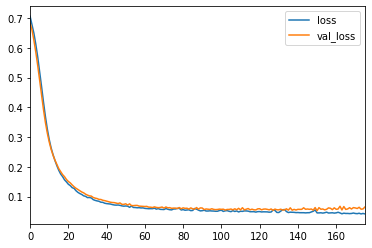

In [29]:
# model stopped at 176th epoch

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding drop out layers

In [31]:
# dropout works in a way such that it randomly neutralizes some of the neurons in the previous layer.
# argument rate is given in the range of 0-1, 0 means no neuron will be neutralized whereas 1 means all the 
# neurons are neutralized

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# for binary classification the final layer should have the activation function as sigmoid since we need result 
# in the range of 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [32]:
model.fit(x=xtrain,y=ytrain,epochs=600,validation_data=(xtest,ytest),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 8ms/sample - loss: 0.7015 - val_loss: 0.6909
Epoch 2/600
426/426 [==============================] - 0s 392us/sample - loss: 0.6876 - val_loss: 0.6818
Epoch 3/600
426/426 [==============================] - 0s 388us/sample - loss: 0.6796 - val_loss: 0.6705
Epoch 4/600
426/426 [==============================] - 0s 383us/sample - loss: 0.6730 - val_loss: 0.6555
Epoch 5/600
426/426 [==============================] - 0s 423us/sample - loss: 0.6498 - val_loss: 0.6366
Epoch 6/600
426/426 [==============================] - 0s 460us/sample - loss: 0.6355 - val_loss: 0.6131
Epoch 7/600
426/426 [==============================] - 0s 423us/sample - loss: 0.6226 - val_loss: 0.5888
Epoch 8/600
426/426 [==============================] - 0s 446us/sample - loss: 0.6031 - val_loss: 0.5664
Epoch 9/600
426/426 [==============================] - 0s 465us/sample - loss: 0.5893 - val_loss: 0.5428
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1590 - val_loss: 0.0844
Epoch 79/600
426/426 [==============================] - 0s 122us/sample - loss: 0.1514 - val_loss: 0.0842
Epoch 80/600
426/426 [==============================] - 0s 129us/sample - loss: 0.1587 - val_loss: 0.0859
Epoch 81/600
426/426 [==============================] - 0s 134us/sample - loss: 0.1380 - val_loss: 0.0869
Epoch 82/600
426/426 [==============================] - 0s 134us/sample - loss: 0.1573 - val_loss: 0.0846
Epoch 83/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1264 - val_loss: 0.0789
Epoch 84/600
426/426 [==============================] - 0s 132us/sample - loss: 0.1443 - val_loss: 0.0762
Epoch 85/600
426/426 [==============================] - 0s 127us/sample - loss: 0.1309 - val_loss: 0.0752
Epoch 86/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1192 - val_loss: 0.0773
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 132us/sample - loss: 0.1102 - val_loss: 0.0564
Epoch 156/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0951 - val_loss: 0.0650
Epoch 157/600
426/426 [==============================] - 0s 146us/sample - loss: 0.1026 - val_loss: 0.0588
Epoch 158/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1023 - val_loss: 0.0592
Epoch 159/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0940 - val_loss: 0.0535
Epoch 160/600
426/426 [==============================] - 0s 134us/sample - loss: 0.1095 - val_loss: 0.0564
Epoch 161/600
426/426 [==============================] - 0s 132us/sample - loss: 0.1019 - val_loss: 0.0551
Epoch 162/600
426/426 [==============================] - 0s 139us/sample - loss: 0.1052 - val_loss: 0.0585
Epoch 163/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0734 - val_loss: 0.0528
Epoch 164/600
426/426 [==============

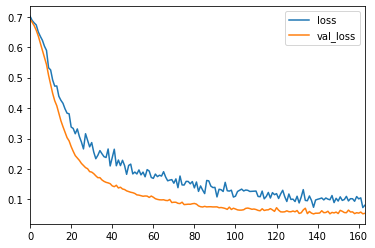

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [34]:
# In classification we don't use model.predict, we use model.predict_classes
predictions = model.predict_classes(xtest)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.99      0.97      0.98        92

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [38]:
print(confusion_matrix(ytest,predictions))

[[50  1]
 [ 3 89]]
